In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [71]:
train_df = pd.read_csv("train_clean.csv", index_col=0)
train_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,17.92,0.000054,1.750,1,80.0,5,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0
1,16.92,0.000034,0.290,0,200.0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
2,31.25,0.000112,0.000,1,96.0,19,0,0,1,0,...,1,0,0,1,1,0,1,0,0,0
3,48.17,0.000133,0.335,0,0.0,120,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
4,32.33,0.000350,0.500,0,232.0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0


In [72]:
val_df = pd.read_csv("val_clean.csv", index_col=0)
val_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,32.33,0.000750,1.585,0,420.0,0,1,0,1,0.0,...,0,1,1,0,0,1,0,0,1,0
1,23.58,0.000179,0.540,0,136.0,1,0,0,1,0.0,...,1,0,1,0,0,1,1,0,0,0
2,36.42,0.000075,0.585,0,240.0,3,1,0,1,0.0,...,1,0,1,0,1,0,1,0,0,0
3,18.42,0.001042,0.125,0,120.0,375,0,0,1,0.0,...,0,1,1,0,1,0,1,0,0,0
4,24.50,0.001334,0.040,0,120.0,475,1,0,1,0.0,...,1,0,1,0,0,1,1,0,0,0


In [73]:
scaler = pd.read_csv("scaler.csv", index_col=0)
scaler

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,30.913206,0.000462,2.257771,2.070064,170.048832,657.492569,0.424628,0.333333,0.666667,0.002123,...,0.505308,0.494692,0.594480,0.405520,0.560510,0.439490,0.917197,0.002123,0.080679,0.424628
std,11.265351,0.000454,3.361196,3.850031,137.412811,1962.387448,0.494812,0.471906,0.471906,0.046078,...,0.500503,0.500503,0.491514,0.491514,0.496853,0.496853,0.275877,0.046078,0.272632,0.494812
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.540000,0.000106,0.165000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,27.830000,0.000275,1.000000,0.000000,160.000000,4.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,36.750000,0.000700,2.605000,2.000000,260.000000,313.500000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,69.500000,0.002100,20.000000,23.000000,720.000000,18027.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
train_df = (train_df - train_df.min())/(train_df.max()-train_df.min())
val_df = (val_df - scaler.loc['min', :])/(scaler.loc['max', :]-scaler.loc['min', :])

In [75]:
val_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,0.333274,0.357143,0.07925,0.0,0.583333,0.000000,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.176323,0.085238,0.02700,0.0,0.188889,0.000055,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.406637,0.035714,0.02925,0.0,0.333333,0.000166,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.083767,0.495952,0.00625,0.0,0.166667,0.020802,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.192825,0.635000,0.00200,0.0,0.166667,0.026349,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [76]:
train_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,0.074798,0.025714,0.08750,0.043478,0.111111,0.000277,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.056861,0.015952,0.01450,0.000000,0.277778,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.313901,0.053571,0.00000,0.043478,0.133333,0.001054,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.617399,0.063571,0.01675,0.000000,0.000000,0.006657,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.333274,0.166667,0.02500,0.000000,0.322222,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


After several tries, I realized that var15 existence was dropping val accuracy down because of it's high dependency with the labels in the training data, while it's not the case in validation data.

In [77]:
train_df.drop('var15', 1, inplace=True)
val_df.drop('var15', 1, inplace=True)

In [78]:
train_df.values.shape

(471, 47)

In [79]:
train_x = train_df.values[:, 0:-2]
train_y = train_df.values[:, -1]
val_x = val_df.values[:, 0:-2]
val_y = val_df.values[:, -1]

Here is the model arch with one hidden layer regularized by a dropout layer

In [437]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,  activation=tf.nn.sigmoid)
])

Here I used accuracy as an evaluation metric because it is a classification problem. It's a suitalble technique to figure out the percentage of the right predictions. As for the optimizer, I've chosen binary crossentropy as we have a binary classified data with it's labels represented by one vector of ones and zeros. If I used on hot encoding for the labels, I would choose categorical cross entropy. This is the same reason why I used sigmoid as an activation for the output layer. 

In [438]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])

In [439]:
num_examples = float(len(train_x))

In [ ]:
hist = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=500, batch_size = 64,
                shuffle=True, verbose=2)

Train on 471 samples, validate on 200 samples
Epoch 1/500
 - 0s - loss: 0.2224 - acc: 0.9151 - val_loss: 0.5723 - val_acc: 0.8650
Epoch 2/500
 - 0s - loss: 0.2114 - acc: 0.9151 - val_loss: 0.5830 - val_acc: 0.8700
Epoch 3/500
 - 0s - loss: 0.1857 - acc: 0.9172 - val_loss: 0.5983 - val_acc: 0.8700
Epoch 4/500
 - 0s - loss: 0.2197 - acc: 0.9066 - val_loss: 0.6058 - val_acc: 0.8650
Epoch 5/500
 - 0s - loss: 0.2378 - acc: 0.8938 - val_loss: 0.5868 - val_acc: 0.8650
Epoch 6/500
 - 0s - loss: 0.2320 - acc: 0.9130 - val_loss: 0.5771 - val_acc: 0.8750
Epoch 7/500
 - 0s - loss: 0.2255 - acc: 0.9066 - val_loss: 0.5934 - val_acc: 0.8700
Epoch 8/500
 - 0s - loss: 0.2172 - acc: 0.9151 - val_loss: 0.5861 - val_acc: 0.8500
Epoch 9/500
 - 0s - loss: 0.2325 - acc: 0.9087 - val_loss: 0.5930 - val_acc: 0.8600
Epoch 10/500
 - 0s - loss: 0.2103 - acc: 0.9151 - val_loss: 0.6011 - val_acc: 0.8650
Epoch 11/500
 - 0s - loss: 0.2373 - acc: 0.9023 - val_loss: 0.5962 - val_acc: 0.8650
Epoch 12/500
 - 0s - loss: 0

Epoch 97/500
 - 0s - loss: 0.1861 - acc: 0.9342 - val_loss: 0.6825 - val_acc: 0.8650
Epoch 98/500
 - 0s - loss: 0.2036 - acc: 0.9130 - val_loss: 0.7027 - val_acc: 0.8600
Epoch 99/500
 - 0s - loss: 0.1975 - acc: 0.9214 - val_loss: 0.7012 - val_acc: 0.8650
Epoch 100/500
 - 0s - loss: 0.1933 - acc: 0.9236 - val_loss: 0.6907 - val_acc: 0.8600
Epoch 101/500
 - 0s - loss: 0.1977 - acc: 0.9193 - val_loss: 0.7042 - val_acc: 0.8600
Epoch 102/500
 - 0s - loss: 0.2106 - acc: 0.9214 - val_loss: 0.7206 - val_acc: 0.8700
Epoch 103/500
 - 0s - loss: 0.1999 - acc: 0.9130 - val_loss: 0.7204 - val_acc: 0.8650
Epoch 104/500
 - 0s - loss: 0.2100 - acc: 0.9108 - val_loss: 0.7221 - val_acc: 0.8700
Epoch 105/500
 - 0s - loss: 0.2131 - acc: 0.9193 - val_loss: 0.7098 - val_acc: 0.8700
Epoch 106/500
 - 0s - loss: 0.1825 - acc: 0.9363 - val_loss: 0.7100 - val_acc: 0.8650
Epoch 107/500
 - 0s - loss: 0.2118 - acc: 0.9172 - val_loss: 0.7154 - val_acc: 0.8700
Epoch 108/500
 - 0s - loss: 0.2141 - acc: 0.9193 - val_lo

Epoch 193/500
 - 0s - loss: 0.1873 - acc: 0.9342 - val_loss: 0.7490 - val_acc: 0.8700
Epoch 194/500
 - 0s - loss: 0.1851 - acc: 0.9363 - val_loss: 0.7552 - val_acc: 0.8600
Epoch 195/500
 - 0s - loss: 0.1952 - acc: 0.9299 - val_loss: 0.7700 - val_acc: 0.8550
Epoch 196/500
 - 0s - loss: 0.1926 - acc: 0.9193 - val_loss: 0.7779 - val_acc: 0.8600
Epoch 197/500
 - 0s - loss: 0.1814 - acc: 0.9321 - val_loss: 0.7781 - val_acc: 0.8500
Epoch 198/500
 - 0s - loss: 0.2035 - acc: 0.9151 - val_loss: 0.7793 - val_acc: 0.8500
Epoch 199/500
 - 0s - loss: 0.2034 - acc: 0.9130 - val_loss: 0.7943 - val_acc: 0.8550
Epoch 200/500
 - 0s - loss: 0.2065 - acc: 0.9214 - val_loss: 0.7964 - val_acc: 0.8650
Epoch 201/500
 - 0s - loss: 0.1705 - acc: 0.9363 - val_loss: 0.7937 - val_acc: 0.8650
Epoch 202/500
 - 0s - loss: 0.1887 - acc: 0.9363 - val_loss: 0.7975 - val_acc: 0.8650
Epoch 203/500
 - 0s - loss: 0.1928 - acc: 0.9406 - val_loss: 0.8076 - val_acc: 0.8600
Epoch 204/500
 - 0s - loss: 0.1820 - acc: 0.9342 - val

Epoch 289/500
 - 0s - loss: 0.1757 - acc: 0.9363 - val_loss: 0.8273 - val_acc: 0.8650
Epoch 290/500
 - 0s - loss: 0.1909 - acc: 0.9342 - val_loss: 0.8162 - val_acc: 0.8750
Epoch 291/500
 - 0s - loss: 0.2018 - acc: 0.9257 - val_loss: 0.8204 - val_acc: 0.8600
Epoch 292/500
 - 0s - loss: 0.1735 - acc: 0.9257 - val_loss: 0.8154 - val_acc: 0.8650
Epoch 293/500
 - 0s - loss: 0.1691 - acc: 0.9342 - val_loss: 0.8164 - val_acc: 0.8650
Epoch 294/500
 - 0s - loss: 0.1653 - acc: 0.9490 - val_loss: 0.8230 - val_acc: 0.8750
Epoch 295/500
 - 0s - loss: 0.1790 - acc: 0.9427 - val_loss: 0.8238 - val_acc: 0.8700
Epoch 296/500
 - 0s - loss: 0.1996 - acc: 0.9257 - val_loss: 0.8179 - val_acc: 0.8550
Epoch 297/500
 - 0s - loss: 0.1841 - acc: 0.9342 - val_loss: 0.8155 - val_acc: 0.8500
Epoch 298/500
 - 0s - loss: 0.2077 - acc: 0.9151 - val_loss: 0.8107 - val_acc: 0.8500
Epoch 299/500
 - 0s - loss: 0.1957 - acc: 0.9214 - val_loss: 0.8196 - val_acc: 0.8600
Epoch 300/500
 - 0s - loss: 0.1754 - acc: 0.9448 - val

Epoch 385/500
 - 0s - loss: 0.1919 - acc: 0.9257 - val_loss: 0.8600 - val_acc: 0.8600
Epoch 386/500
 - 0s - loss: 0.1684 - acc: 0.9342 - val_loss: 0.8603 - val_acc: 0.8600
Epoch 387/500
 - 0s - loss: 0.2061 - acc: 0.9278 - val_loss: 0.8765 - val_acc: 0.8650
Epoch 388/500
 - 0s - loss: 0.1681 - acc: 0.9214 - val_loss: 0.8846 - val_acc: 0.8650
Epoch 389/500
 - 0s - loss: 0.2075 - acc: 0.9172 - val_loss: 0.8730 - val_acc: 0.8550
Epoch 390/500
 - 0s - loss: 0.1861 - acc: 0.9448 - val_loss: 0.8639 - val_acc: 0.8600
Epoch 391/500
 - 0s - loss: 0.2174 - acc: 0.9151 - val_loss: 0.8638 - val_acc: 0.8700
Epoch 392/500
 - 0s - loss: 0.2016 - acc: 0.9193 - val_loss: 0.8685 - val_acc: 0.8650
Epoch 393/500
 - 0s - loss: 0.1721 - acc: 0.9406 - val_loss: 0.8572 - val_acc: 0.8650
Epoch 394/500
 - 0s - loss: 0.1568 - acc: 0.9406 - val_loss: 0.8603 - val_acc: 0.8600
Epoch 395/500
 - 0s - loss: 0.1964 - acc: 0.9342 - val_loss: 0.8621 - val_acc: 0.8600
Epoch 396/500
 - 0s - loss: 0.1863 - acc: 0.9278 - val

Epoch 481/500
 - 0s - loss: 0.1573 - acc: 0.9299 - val_loss: 0.8896 - val_acc: 0.8600
Epoch 482/500
 - 0s - loss: 0.1713 - acc: 0.9321 - val_loss: 0.8953 - val_acc: 0.8650
Epoch 483/500
 - 0s - loss: 0.1874 - acc: 0.9342 - val_loss: 0.9015 - val_acc: 0.8550
Epoch 484/500
 - 0s - loss: 0.2107 - acc: 0.9193 - val_loss: 0.8812 - val_acc: 0.8550
Epoch 485/500
 - 0s - loss: 0.1869 - acc: 0.9236 - val_loss: 0.8738 - val_acc: 0.8550
Epoch 486/500
 - 0s - loss: 0.1734 - acc: 0.9321 - val_loss: 0.8778 - val_acc: 0.8600
Epoch 487/500
 - 0s - loss: 0.1805 - acc: 0.9321 - val_loss: 0.8958 - val_acc: 0.8650
Epoch 488/500
 - 0s - loss: 0.1695 - acc: 0.9384 - val_loss: 0.9159 - val_acc: 0.8700
Epoch 489/500
 - 0s - loss: 0.1783 - acc: 0.9278 - val_loss: 0.9081 - val_acc: 0.8700
Epoch 490/500
 - 0s - loss: 0.2103 - acc: 0.9151 - val_loss: 0.8801 - val_acc: 0.8700
Epoch 491/500
 - 0s - loss: 0.1692 - acc: 0.9278 - val_loss: 0.8776 - val_acc: 0.8500
Epoch 492/500
 - 0s - loss: 0.2168 - acc: 0.9193 - val

In [447]:
model.save("model.h5")

In [448]:
import matplotlib.pyplot as plt

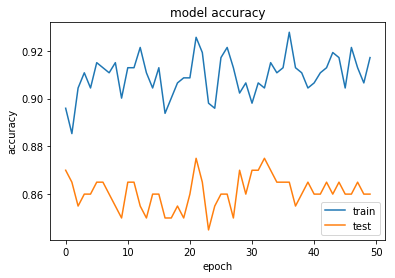

In [449]:
fig = plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

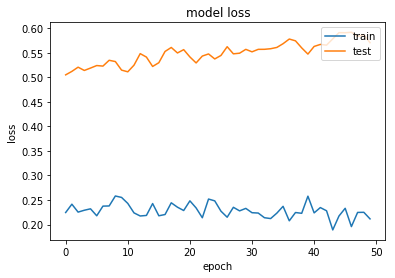

In [450]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')